# Utilities

In [1]:
# Requires extra package:
#! sage -pip install "pseudowalls==0.0.3" --extra-index-url https://gitlab.com/api/v4/projects/43962374/packages/pypi/simple
%display latex

from pseudowalls import *

Δ = lambda v: v.Q_tilt()
alpha = stability.Tilt().alpha
beta = stability.Tilt().beta

def beta_minus(v):
    solutions = solve(
        stability.Tilt(alpha=0).degree(v)==0,
        beta)
    return min(map(lambda s: s.rhs(), solutions))

class Object(object):
  pass

var("beta", latex_name=r"{\beta_0}")


beta

Fix a Chern character $v$ with positive rank and $\Delta(v) \geq 0$

In [2]:
v = Chern_Char(*var("R C D", domain="real"))
v

Let $u$ be a semistabilizer fitting problem 1 or 2 (destabilizing $v$ going down $\Theta_v^{-}$)

In [3]:
u = Chern_Char(*var("r c d", domain="real"))
u

# Bounds on $\operatorname{ch}_2(u)=d$

In [4]:
var("q", domain="real") # Symbol for q=\chern_1^{\beta}(u)

q

Express $c$ in terms of $q:=\operatorname{ch}_1^{\beta}(u)$

In [5]:
c_in_terms_of_q = solve(q == u.twist(beta).ch[1], c)[0]
assert c_in_terms_of_q.lhs() == c, "Meant to be an expression for c"

In [6]:
c_in_terms_of_q

c == beta*r + q

## $\operatorname{ch}_2^{P}(u) > 0$

For problem 2, this amounts to $\operatorname{ch}_2^{\beta}(u) > 0$

In [7]:
positive_radius_condition_with_q = (
    (
        (0 > - u.twist(beta).ch[2])
        + d # rearrange for d
    )
    .subs(solve(q == u.twist(beta).ch[1], c)[0]) # express c in term of q
    .expand()
)
positive_radius_d_lowerbound = positive_radius_condition_with_q.rhs()

positive_radius_condition_with_q

d > 1/2*beta^2*r + beta*q

Separate out the terms of the corresponding lower bound on $d$:

In [8]:
positive_radius_lowerbound_terms = Object()

positive_radius_lowerbound_terms.const = positive_radius_condition_with_q.rhs().subs(r==0)

positive_radius_lowerbound_terms.linear = (
    positive_radius_condition_with_q.rhs()
    - positive_radius_lowerbound_terms.const
)

positive_radius_lowerbound_terms.hyperbolic = 0

(positive_radius_lowerbound_terms.linear,
 positive_radius_lowerbound_terms.const,
 positive_radius_lowerbound_terms.hyperbolic)

(1/2*beta^2*r, beta*q, 0)

## $\Delta(u) \geq 0$

Express this inequality in terms of $q$

In [9]:
bgmlv2_with_q = ((0 <= Δ(u))
    .subs(c_in_terms_of_q))

bgmlv2_with_q

0 <= (beta*r + q)^2 - 2*d*r

Rearrange expression for $d$

In [10]:
bgmlv2_d_ineq = (bgmlv2_with_q
    + 2*d*r # move d to rhs
) / (2*r) # scale-out d coefficient (r>0)

assert bgmlv2_d_ineq.lhs() == d, "Should be ineq for d"

bgmlv2_d_ineq

d <= 1/2*(beta*r + q)^2/r

Keep hold of the upper bound for $d$:

In [11]:
bgmlv2_d_upperbound = bgmlv2_d_ineq.rhs().expand()
bgmlv2_d_upperbound

1/2*beta^2*r + beta*q + 1/2*q^2/r

Separate out the terms of this lower bound for d

In [12]:
bgmlv2_d_upperbound_terms = Object()

bgmlv2_d_upperbound_without_hyp = (
    bgmlv2_d_upperbound
    .subs(1/r == 0)
)

bgmlv2_d_upperbound_terms.const = (
    bgmlv2_d_upperbound_without_hyp
    .subs(r==0)
)

bgmlv2_d_upperbound_terms.linear = (
    bgmlv2_d_upperbound_without_hyp
    - bgmlv2_d_upperbound_terms.const
).expand()

bgmlv2_d_upperbound_terms.hyperbolic = (
    bgmlv2_d_upperbound
    - bgmlv2_d_upperbound_without_hyp
).expand()

In [13]:
(bgmlv2_d_upperbound_terms.linear,
 bgmlv2_d_upperbound_terms.const,
 bgmlv2_d_upperbound_terms.hyperbolic)

(1/2*beta^2*r, beta*q, 1/2*q^2/r)

Sanity check:

In [14]:
assert ( bgmlv2_d_upperbound
- bgmlv2_d_upperbound_terms.const
- bgmlv2_d_upperbound_terms.linear
- bgmlv2_d_upperbound_terms.hyperbolic) == 0, "Error in terms separation"

## $\Delta(v-u) \geq 0$

Express this inequality in terms of $q$

In [15]:
bgmlv3_with_q = ((0 <= Δ(v-u))
    .subs(c_in_terms_of_q)
)

bgmlv3_with_q

0 <= (beta*r - C + q)^2 - 2*(D - d)*(R - r)

Rearrange in terms of $d$ assuming $r>R$

In [16]:
bgmlv3_d_ineq = (
    (
        bgmlv3_with_q
        + 2*(D-d)*(R-r) # move d term to lhs
    )/2/(r-R) # assume r>R
) + D

assert bgmlv3_d_ineq.lhs() == d, "Should be bound for d"
assert not bgmlv3_d_ineq.rhs().has(d), "Should be bound for d"

bgmlv3_d_upperbound = bgmlv3_d_ineq.rhs()
bgmlv3_d_ineq

d <= D - 1/2*(beta*r - C + q)^2/(R - r)

In [17]:
# symbols to represent ch_i^\beta(v) and
var("ch1bv", domain="real", latex_name=r"\operatorname{ch}_1^{\beta_0}(v)")
var("ch2bv", domain="real", latex_name=r"\operatorname{ch}_2^{\beta_0}(v)")

ch1bv, ch2bv

(ch1bv, ch2bv)

In [18]:
var("betamin", latex_name=r"{\beta_{-}}")
var("ch1bminv", domain="real", latex_name=r"\operatorname{ch}_1^{\beta_{-}}(v)")
var("ch2bminv", domain="real", latex_name=r"\operatorname{ch}_2^{\beta_{-}}(v)")

betamin_subs = [beta==betamin, ch1bv==ch1bminv, ch2bv==ch2bminv]

Define expression for the different terms of this bound of $d$ in terms of $\phi$ and $\psi$

In [19]:
bgmlv3_d_upperbound_terms = Object()

bgmlv3_d_upperbound_terms.linear = bgmlv2_d_upperbound_terms.linear
bgmlv3_d_upperbound_terms.const = ch2bv + bgmlv2_d_upperbound_terms.const
bgmlv3_d_upperbound_terms.hyperbolic = (ch1bv - q)^2/2/(r-R)

(bgmlv3_d_upperbound_terms.linear
 + bgmlv3_d_upperbound_terms.const
 + bgmlv3_d_upperbound_terms.hyperbolic)

1/2*beta^2*r + beta*q - 1/2*(ch1bv - q)^2/(R - r) + ch2bv

Verify that the expression above indeed is equal the upper bound on $d$ given by $\Delta(v-u) \geq 0$

In [20]:
assert (
    (bgmlv3_d_upperbound_terms.linear
     + bgmlv3_d_upperbound_terms.const
     + bgmlv3_d_upperbound_terms.hyperbolic
     - bgmlv3_d_ineq.rhs())
    .subs(ch2bv == v.twist(beta).ch[2])
    .subs(ch1bv == v.twist(beta).ch[1])
) == 0, "Sanity check"

# Specialize to problem 2

Add extra attributes to the bound objects above with a specialization to the case $\chern_2^{\beta}(v)=0$

In [21]:
for bound_terms in [
    positive_radius_lowerbound_terms,
    bgmlv2_d_upperbound_terms,
    bgmlv3_d_upperbound_terms
]:
    bound_terms.problem2 = Object()
    bound_terms.problem2.const = bound_terms.const.subs(ch2bv == 0)
    bound_terms.problem2.linear = bound_terms.linear.subs(ch2bv == 0)
    bound_terms.problem2.hyperbolic = bound_terms.hyperbolic.subs(ch2bv == 0)

View the specialized bounds:

In [22]:
sum(
    r" \\ " + (latex(bound_terms.problem2.const)
    + " + " + latex(bound_terms.problem2.linear)
    + " + " + latex(bound_terms.problem2.hyperbolic))
    for bound_terms in [
        positive_radius_lowerbound_terms,
        bgmlv2_d_upperbound_terms,
        bgmlv3_d_upperbound_terms
    ]
)

0 \\ {{\beta_0}} q + \frac{1}{2} \, {{\beta_0}}^{2} r + 0 \\ {{\beta_0}} q + \frac{1}{2} \, {{\beta_0}}^{2} r + \frac{q^{2}}{2 \, r} \\ {{\beta_0}} q + \frac{1}{2} \, {{\beta_0}}^{2} r + -\frac{{\left({\operatorname{ch}_1^{\beta_0}(v)} - q\right)}^{2}}{2 \, {\left(R - r\right)}}

## Plots for all Bounds on $d$

In [23]:
v_example = Chern_Char(3,2,-2)
q_example = 7/3

def plot_d_bound(
    v_example,
    q_example,
    ymax=5,
    ymin=-2,
    xmax=20,
    aspect_ratio=None):

    # Equations to plot imminently representing the bounds on d:
    eq2 = (bgmlv2_d_upperbound
        .subs(R == v_example.ch[0])
        .subs(C == v_example.ch[1])
        .subs(D == v_example.ch[2])
        .subs(beta = beta_minus(v_example))
        .subs(q == q_example)
    )

    eq3 = (bgmlv3_d_upperbound
        .subs(R == v_example.ch[0])
        .subs(C == v_example.ch[1])
        .subs(D == v_example.ch[2])
        .subs(beta = beta_minus(v_example))
        .subs(q == q_example)
    )

    eq4 = (positive_radius_d_lowerbound
        .subs(q == q_example)
        .subs(beta = beta_minus(v_example))
    )

    example_bounds_on_d_plot = (
        plot(
            eq3,
            (r,v_example.ch[0],xmax),
            color='green',
            #linestyle = "dashed",
            legend_label=r"upper bound: $\Delta(v-u) \geq 0$",
        )
        + plot(
            eq2,
            (r,0,xmax),
            color='blue',
            #linestyle = "dashed",
            legend_label=r"upper bound: $\Delta(u) \geq 0$"
        )
        + plot(
            eq4,
            (r,0,xmax),
            color='orange',
            #linestyle = "dotted",
            legend_label=r"lower bound: $\mathrm{ch}_2^{\beta_{-}}(u)>0$"
        )
    )
    example_bounds_on_d_plot.ymin(ymin)
    example_bounds_on_d_plot.ymax(ymax)
    example_bounds_on_d_plot.axes_labels(['$r$', '$d$'])
    if aspect_ratio:
        example_bounds_on_d_plot.set_aspect_ratio(aspect_ratio)
    return example_bounds_on_d_plot

### Bounds on $d$ with Minimal $q=\operatorname{ch}^{\beta}_1(u)$

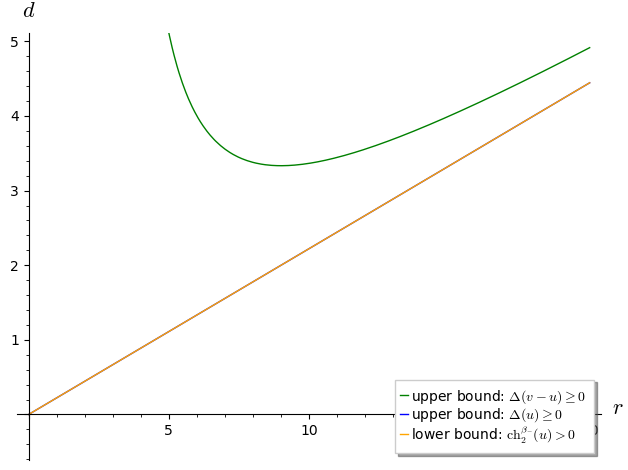

In [24]:
bounds_on_d_qmin = plot_d_bound(v_example, 0, ymin=-0.5)
bounds_on_d_qmin

### Bounds on $d$ with Maximal $q=\operatorname{ch}^{\beta}_1(u)$

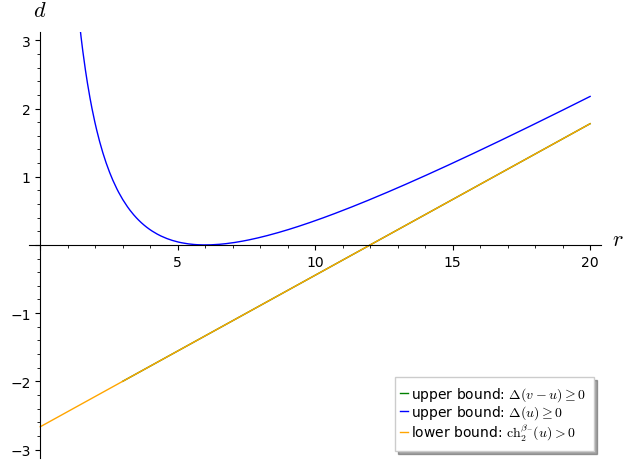

In [25]:
bounds_on_d_qmax = plot_d_bound(v_example, 4, ymin=-3, ymax=3)
bounds_on_d_qmax

### Bounds on $d$ with Mid-way $q=\operatorname{ch}^{\beta}_1(u)$

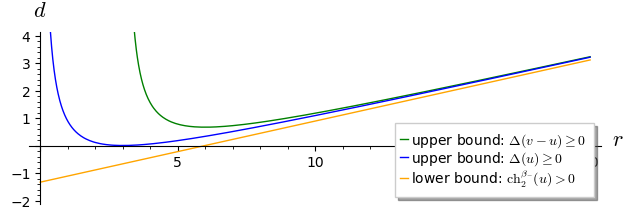

In [26]:
typical_bounds_on_d = plot_d_bound(v_example, 2, ymax=4, ymin=-2, aspect_ratio=1)
typical_bounds_on_d

# Bounds on Semistabilizer Rank $r=\operatorname{ch}_0(u)$

Express the two conditions corresponding to the upper bounds on $d$ from $\Delta(u) \geq 0$ or $\Delta(v-u) \geq 0$ being more than $\frac{k_{v,q}}{2n^2}$ higher than the lowerbound given by $\operatorname{ch}_2^{\beta}(u) > 0$

In [27]:
var("a_v b_q n") # Define symbols introduce for values of beta and q
var("lcm_m_2n2", latex_name = r"\operatorname{lcm}(m,2n^2)") # more semantic variable name

beta_value_expr = (beta == a_v/n)
q_value_expr = (q == b_q/n)

# placeholder for the specific values of k (start with 1):
var("k", domain="real", latex_name="k_{v,q}")

assymptote_gap_condition1 = (k/lcm_m_2n2 < bgmlv2_d_upperbound_terms.hyperbolic)
assymptote_gap_condition2 = (k/lcm_m_2n2 < bgmlv3_d_upperbound_terms.hyperbolic)

assymptote_gap_condition1, assymptote_gap_condition2

(k/lcm_m_2n2 < 1/2*q^2/r, k/lcm_m_2n2 < -1/2*(ch1bv - q)^2/(R - r))

Rearrange these two conditions into bounds for $r$:

In [28]:
r_upper_bound1 = (
    assymptote_gap_condition1
    * r * lcm_m_2n2 / k
)

assert r_upper_bound1.lhs() == r

r_upper_bound2 = (
    assymptote_gap_condition2
    * (r-R) * lcm_m_2n2 / k + R
)

assert r_upper_bound2.lhs() == r

(r_upper_bound1, r_upper_bound2)

(r < 1/2*lcm_m_2n2*q^2/k, r < 1/2*(ch1bv - q)^2*lcm_m_2n2/k + R)

### Main Theorem 1

The first main theorem is about these two upper bounds on $r$ needing to be satisfied for $\kappa = 1$ (weakest form)

In [29]:
main_theorem1 = Object()
main_theorem1.r_upper_bound1 = r_upper_bound1.subs(k == 1).rhs()
main_theorem1.r_upper_bound2 = r_upper_bound2.subs(k == 1).rhs()

r"r < \min\left(" + latex(main_theorem1.r_upper_bound1) + "," + latex(main_theorem1.r_upper_bound2) + r"\right)"

r < \min\left( \frac{1}{2} \, {\operatorname{lcm}(m,2n^2)} q^{2} , \frac{1}{2} \, {\left({\operatorname{ch}_1^{\beta_{-}}(v)} - q\right)}^{2} {\operatorname{lcm}(m,2n^2)} + R \right)

### Main Theorem 1 Corollary

In [30]:
var("m", domain="real")
var("bgmlv_v", domain="real", latex_name=r"\Delta(v)")
var("l", latex_name=r"\ell")
# Delta to represent bogomolov(v)
# m to represent \ell^2

q_sol = solve(
    main_theorem1.r_upper_bound1
    == main_theorem1.r_upper_bound2
    , q
)[0].rhs()

q_sol

1/2*(ch1bminv^2*lcm_m_2n2 + 2*R)/(ch1bminv*lcm_m_2n2)

In [31]:
main_theorem1.corollary_intermediate = (main_theorem1.r_upper_bound1
    .expand()
    .subs(q==q_sol)
    .subs(k==1)
).expand()

main_theorem1.corollary_intermediate

1/8*ch1bminv^2*lcm_m_2n2 + 1/2*R + 1/2*R^2/(ch1bminv^2*lcm_m_2n2)

In [32]:
main_theorem1.corollary_r_bound = (main_theorem1.r_upper_bound1
    .expand()
    .subs(q==q_sol)
    .subs(k==1)
    .subs(ch1bv**2 == bgmlv_v/m)
    .subs(1/ch1bv**2 == m/bgmlv_v)
).expand()

main_theorem1.corollary_r_bound

1/8*ch1bminv^2*lcm_m_2n2 + 1/2*R + 1/2*R^2/(ch1bminv^2*lcm_m_2n2)

# Stronger Theorem Bound

In [33]:
main_theorem2 = Object()
main_theorem2.r_upper_bound1 = r_upper_bound1.rhs()
main_theorem2.r_upper_bound2 = r_upper_bound2.rhs()

r"r < \min\left(" + latex(main_theorem2.r_upper_bound1) + "," + latex(main_theorem2.r_upper_bound2) + r"\right)"

r < \min\left( \frac{{\operatorname{lcm}(m,2n^2)} q^{2}}{2 \, {k_{v,q}}} , \frac{{\left({\operatorname{ch}_1^{\beta_{-}}(v)} - q\right)}^{2} {\operatorname{lcm}(m,2n^2)}}{2 \, {k_{v,q}}} + R \right)

# Stronger Theorem Corollary Bound

Specialize to $m=1$ or $2$

In [34]:
main_theorem2_corollary = Object()
main_theorem2_corollary.r_upper_bound1 = main_theorem2.r_upper_bound1.subs(lcm_m_2n2 == 2*n^2)
main_theorem2_corollary.r_upper_bound2 = main_theorem2.r_upper_bound2.subs(lcm_m_2n2 == 2*n^2)

r"r < \min\left(" + latex(main_theorem2_corollary.r_upper_bound1) + "," + latex(main_theorem2_corollary.r_upper_bound2) + r"\right)"

r < \min\left( \frac{n^{2} q^{2}}{{k_{v,q}}} , \frac{{\left({\operatorname{ch}_1^{\beta_{-}}(v)} - q\right)}^{2} n^{2}}{{k_{v,q}}} + R \right)

# Unsorted Extras

In [35]:
c_in_terms_of_q.subs([q_value_expr,beta_value_expr])

c == a_v*r/n + b_q/n

In [36]:
rhs_numerator = (positive_radius_condition_with_q
    .rhs()
    .subs([q_value_expr,beta_value_expr])
    .factor()
    .numerator()
)
rhs_numerator

(a_v*r + 2*b_q)*a_v

In [37]:
(positive_radius_condition_with_q
     .subs([q_value_expr,beta_value_expr])
     .factor())

d > 1/2*(a_v*r + 2*b_q)*a_v/n^2